In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from risk_analytics_tools.RiskModel import RiskModel
%matplotlib inline
pd.set_option('display.max_columns',500)

In [4]:
df = pd.read_excel('datos_corte_final.xlsx')

In [5]:
df.head()

Marca temporal                              Carrera  Género  \
0 2018-10-17 16:46:19.603  Matemáticas Aplicadas y Computación  Hombre   
1 2018-10-17 16:52:37.461  Matemáticas Aplicadas y Computación   Mujer   
2 2018-10-17 16:54:48.531  Matemáticas Aplicadas y Computación  Hombre   
3 2018-10-17 17:07:29.619  Matemáticas Aplicadas y Computación  Hombre   
4 2018-10-17 17:26:57.906  Matemáticas Aplicadas y Computación  Hombre   

   Edad 🎂       Estado civil ¿Tienes hijos?  \
0      18          👤 Soltero             No   
1      18           💍 Casado             Sí   
2      18          👤 Soltero             No   
3      42          👤 Soltero             No   
4      18  👥 En una relación             No   

  ¿Tienes alguna dificultad para? [👓 Ver]  \
0                                      Si   
1                                      Si   
2                                      No   
3                                      No   
4                                      Si   

  ¿Tienes alguna dificultad para? [👂 Escuchar]  \
0                                           No   
1                                           No   
2                                           No   
3                                           Si   
4                                           No   

  ¿Tienes alguna dificultad para? [💪 Realizar alguna actividad física]  \
0                                                 No                     
1                                                 No                     
2                                                 No                     
3                                                 No                     
4                                                 No                     

  ¿Dónde vives actualmente? ¿En qué delegación o municipio?  \
0                      CDMX              Gustavo A. Madero    
1          Estado de México                       Naucalpan   
2          Estado de México               Los reyes la paz    
3          Estado de México            Atizapan de zaragoza   
4                      CDMX                    Azcapotzalco   

   ¿Cuánto tiempo dura (en minutos) el trayecto de tu casa a la facultad? ⏱  \
0                                              120.0                          
1                                               60.0                          
2                                              130.0                          
3                                                2.0                          
4                                               40.0                          

  ¿Qué medio de transporte utilizas para llegar a la facultad?  \
0  Transporte público (metro, metrobus, micro, co...             
1  Transporte público (metro, metrobus, micro, co...             
2  Transporte público (metro, metrobus, micro, co...             
3  Vehículo propio (Automóvil, motocicleta, moton...             
4  Vehículo propio (Automóvil, motocicleta, moton...             

  ¿Cuál de las siguientes opciones describe tu tipo de vivienda?  \
0                                            Rentada               
1  Ocupada sin pagar renta (incluye casa de famil...               
2                                            Rentada               
3                           Propia (se esta pagando)               
4                            Propia (ya esta pagada)               

  ¿Con quién vives? (Puedes seleccionar más de una)  \
0                 👩🏽 Mamá, 👨🏽 Papá, 👦🏽👧🏽 Hermano(s)   
1                                             Otros   
2                          👩🏽 Mamá, 👦🏽👧🏽 Hermano(s)   
3                                  👩🏽 Mamá, 👨🏽 Papá   
4                           👩🏽 Mamá, 👨🏽 Papá, Otros   

   ¿Cuántas personas en total viven en tu hogar? Incluyéndote a ti  \
0                                                  6                 
1                                                  6                 
2                                                  3             

In [6]:
df.Carrera.value_counts()

Actuaria                               152
Matemáticas Aplicadas y Computación     75
Name: Carrera, dtype: int64

In [7]:
var = [u'Edad 🎂',
       u'¿Cuánto tiempo dura (en minutos) el trayecto de tu casa a la facultad? ⏱',
      u'¿Cuántas personas en total viven en tu hogar? Incluyéndote a ti',
      u'¿Qué promedio obtuviste en el bachillerato?',
       u'¿En cuántos años lo terminaste?',
      u'¿Cuántos días a la semana dedicas tiempo para realizar las siguientes actividades? [Actividades sociales (fiestas, reuniones con amigos, familia, etc.)]',
      u'¿A cuánto aproximadamente ascienden los ingresos de tu hogar(considerando a todos los que aportan)?']

In [8]:
d = dict(zip(var,['x%d'%i for i in range(1,len(var)+1)]))

In [9]:
X = df[var].copy()

In [10]:
X.rename(columns=d,inplace=True)

In [11]:
y = (df['Carrera'] == 'Actuaria').astype(int)

In [12]:
X['target'] = y

In [14]:
X['id'] = X.index+1

In [17]:
X['a'] = 'a'

In [15]:
X.head()

x1     x2  x3    x4  x5  x6     x7  target  id
0  18  120.0   6  7.43   3   0   4000       0   1
1  18   60.0   6  7.80   3   1   5000       0   2
2  18  130.0   3  8.34   3   0   8000       0   3
3  42    2.0   8  7.45   6   1  13000       0   4
4  18   40.0   4  8.50   3   2  35000       0   5

In [18]:
rm = RiskModel(df=X,id='id',obj='target',var_cont=['x%d'%i for i in range(1,len(var)+1)],var_disc=['a'])

Normalizing discrete features...
Removing features without variance...
features a have been removed
Discretizing continuous features...
best number of bins is 2 for feature x1 with iv 0.00
best number of bins is 5 for feature x2 with iv 0.06
best number of bins is 6 for feature x3 with iv 0.18


/home/jose/Documentos/code/risk_analytics_tools/RiskModel.py:260: RuntimeWarning: divide by zero encountered in log
  iv_data_frame['W'] = np.log(iv_data_frame['NE'] / iv_data_frame['E'])


best number of bins is 2 for feature x4 with iv 2.01
best number of bins is 2 for feature x5 with iv 0.00
best number of bins is 3 for feature x6 with iv 0.01
best number of bins is 2 for feature x7 with iv 0.00
best number of bins is 2 for feature x1 with iv 0.10
best number of bins is 4 for feature x2 with iv 0.10
best number of bins is 2 for feature x3 with iv 0.10
best number of bins is 4 for feature x4 with iv 3.05
best number of bins is 2 for feature x5 with iv 0.00
best number of bins is 3 for feature x6 with iv 0.07
best number of bins is 4 for feature x7 with iv 0.16
Selecting best features...
Applying WOE transformation...


/home/jose/Documentos/code/risk_analytics_tools/RiskModel.py:517: FutureWarning: 'Cop_x4' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  work_data_frame = work_data_frame.merge(iv_data_frame[[feat, 'W']], on=feat, how='left')
/home/jose/Documentos/code/risk_analytics_tools/RiskModel.py:517: FutureWarning: 'Ceq_x3' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  work_data_frame = work_data_frame.merge(iv_data_frame[[feat, 'W']], on=feat, how='left')
/home/jose/Documentos/code/risk_analytics_tools/RiskModel.py:517: FutureWarning: 'Cop_x7' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  work_data_frame = work_data_frame.merge(iv_data_frame[[feat, 'W']], on=feat, how='left')
/home/jose/Documentos/code/risk_analytics_tools/RiskModel.py:517: FutureWarning: 'Cop

Fitting logistic model...
Applying credit scoring...
score has a range of 598 points
count    227.000000
mean     450.198238
std      134.476206
min      159.000000
25%      360.000000
50%      424.000000
75%      529.000000
max      757.000000
Name: score, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


/home/jose/Documentos/cg/amex2/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jose/Documentos/cg/amex2/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/jose/Documentos/cg/amex2/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Performing graphical outputs...
Exporting scorecard to excel...


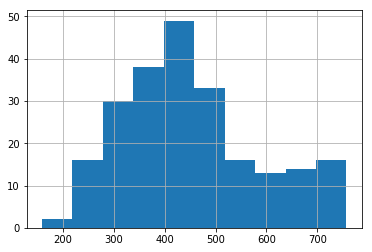

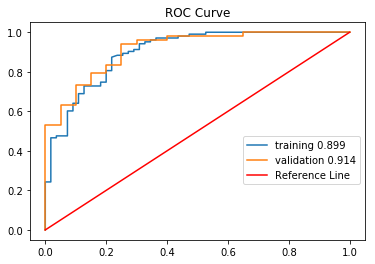

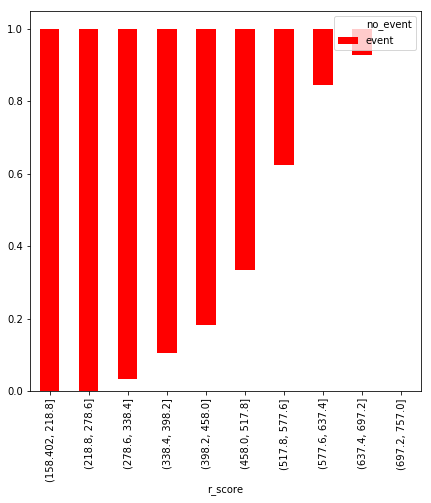

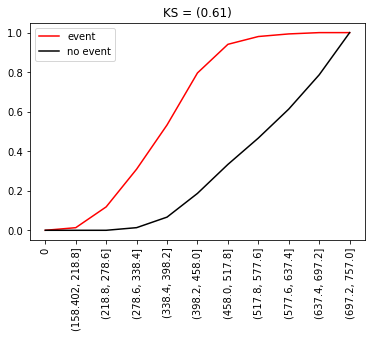

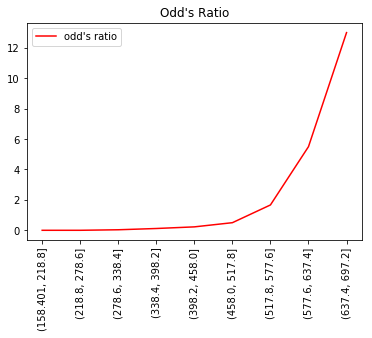

In [19]:
rm.auto_train(default_non_linear_use=False)

In [21]:
d

{u'Edad \U0001f382': 'x1',
 u'\xbfA cu\xe1nto aproximadamente ascienden los ingresos de tu hogar(considerando a todos los que aportan)?': 'x7',
 u'\xbfCu\xe1ntas personas en total viven en tu hogar? Incluy\xe9ndote a ti': 'x3',
 u'\xbfCu\xe1nto tiempo dura (en minutos) el trayecto de tu casa a la facultad? \u23f1': 'x2',
 u'\xbfCu\xe1ntos d\xedas a la semana dedicas tiempo para realizar las siguientes actividades? [Actividades sociales (fiestas, reuniones con amigos, familia, etc.)]': 'x6',
 u'\xbfEn cu\xe1ntos a\xf1os lo terminaste?': 'x5',
 u'\xbfQu\xe9 promedio obtuviste en el bachillerato?': 'x4'}

In [20]:
rm.scorecard

points
feature bin                          
Ceq_x3  01. (-|2.0]                88
        02. (2.0|4.0]              62
        03. (4.0|6.0]              99
        04. (6.0|8.0]             -11
        05. (8.0|10.0]            163
        06. (10.0|+)              121
Cop_x1  01. (-|18.0]               81
        02. (18.0|19.0]            75
        03. (19.0|+)               71
Cop_x2  01. (-|30.0]               76
        02. (30.0|45.0]           100
        03. (45.0|85.0]            73
        04. (85.0|115.0]           59
        05. (115.0|130.0]          82
        06. (130.0|+)              97
Cop_x4  01. (-|7.97]              307
        02. (7.97|8.5]            173
        03. (8.5|8.78]             -2
        04. (8.78|8.8]              8
        05. (8.8|8.99]            -97
        06. (8.99|9.22]            82
        07. (9.22|+)               38
Cop_x6  01. (-|0.0]                85
        02. (0.0|1.0]              72
        03. (1.0|2.0]              82
        04. (2.0|+)                77
Cop_x7  01. (-|3000.0]             88
        02. (3000.0|4800.0]        97
        03. (4800.0|7800.0]        55
        04. (7800.0|10000.0]       90
        05. (10000.0|20000.0]      79
        06. (20000.0|+)            54